In [160]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import isfile, join

In [161]:
image_types = [
    'bottle',
    'cable',
    'capsule',
    'carpet',
    'grid',
    'hazelnut',
    'leather',
    'metal_nut',
    'pill',
    'screw',
    'tile',
    'toothbrush',
    'transistor',
    'wood',
    'zipper'
]

len(image_types)

15

In [157]:
full_data = np.load("data/det-result-linear-rewrite.npy", allow_pickle=True)
# full_fpr = dict(enumerate(full_data.flatten(), 1))['leather']['fpr']
# full_tpr = dict(enumerate(full_data.flatten(), 1))['leather']['tpr']
# full_auroc = dict(enumerate(full_data.flatten(), 1))['leather']['auroc']
# full_data
list(dict(enumerate(full_data.flatten(), 1))[1].keys())

['pill',
 'transistor',
 'toothbrush',
 'screw',
 'leather',
 'carpet',
 'metal_nut',
 'hazelnut',
 'grid',
 'capsule',
 'cable',
 'bottle']

In [259]:
files = ["seg-result-linear", "seg-result-full", "det-result-linear", "det-result-full"]

for file in files:
    full_data = dict(enumerate(np.load(f"data/{file}-rewrite.npy", allow_pickle=True).flatten(), 1))[1]
    print(full_data.keys(), len(full_data.keys()))
    for image in image_types:
        if not type(full_data[image]) == dict:
            print('l')
            full_data[image] = dict(enumerate(full_data[image].flatten(), 1))[1]
#         if image not in full_data.keys():
#             print(f"Missing in complete set {image}")
#             if isfile(f"data/{image}{file}.npy"):
#                 print(f"{image}{file}")
#                 item_data = np.load(f"data/{image}{file}.npy", allow_pickle=True)
#                 full_data[image] = item_data
#                 print("We have the data in a separate file")
                
#     print(full_data)
#     np.save(f"data/{file}-rewrite.npy", np.array(full_data))
    

dict_keys(['pill', 'transistor', 'toothbrush', 'screw', 'leather', 'carpet', 'metal_nut', 'hazelnut', 'grid', 'capsule', 'cable', 'bottle', 'zipper', 'tile', 'wood']) 15
dict_keys(['wood', 'tile', 'transistor', 'pill', 'toothbrush', 'screw', 'carpet', 'leather', 'metal_nut', 'hazelnut', 'grid', 'capsule', 'cable', 'bottle', 'zipper']) 15
dict_keys(['pill', 'transistor', 'toothbrush', 'screw', 'leather', 'carpet', 'metal_nut', 'hazelnut', 'grid', 'capsule', 'cable', 'bottle', 'zipper', 'tile', 'wood']) 15
dict_keys(['wood', 'tile', 'transistor', 'pill', 'toothbrush', 'screw', 'carpet', 'leather', 'metal_nut', 'hazelnut', 'grid', 'capsule', 'cable', 'bottle', 'zipper']) 15


In [203]:
def rewrite_dict(dic):
    values = {}
    k = list(dic.keys())
    if len(k) > 1:
        values[k[1]] = dic[k[1]]
    elif k[0] != 1:
        values[k[0]] = dic[k[0]]
    if k[0] == 1:
        values.update(rewrite_dict(dic[1]))
    return values

In [222]:
files = ["seg-result-linear", "seg-result-full", "det-result-linear", "det-result-full"]

for file in files:
    orig_file_data = np.load(f"data/1{file}.npy", allow_pickle=True)
    file_data = np.load(f"data/{file}.npy", allow_pickle=True)
    val = rewrite_dict(dict(enumerate(orig_file_data.flatten(), 1)))
    val.update(rewrite_dict(dict(enumerate(file_data.flatten(), 1))))
    print(val.keys(), len(val.keys()))
#     np.array(val)
#     np.save(f"data/{file}-rewrite.npy", np.array(val))

dict_keys(['pill', 'transistor', 'toothbrush', 'screw', 'leather', 'carpet', 'metal_nut', 'hazelnut', 'grid', 'capsule', 'cable', 'bottle', 'zipper']) 13
dict_keys(['wood', 'tile', 'transistor', 'pill', 'toothbrush', 'screw', 'carpet', 'leather', 'metal_nut', 'hazelnut', 'grid', 'capsule', 'cable', 'bottle', 'zipper']) 15
dict_keys(['pill', 'transistor', 'toothbrush', 'screw', 'leather', 'carpet', 'metal_nut', 'hazelnut', 'grid', 'capsule', 'cable', 'bottle', 'zipper']) 13
dict_keys(['wood', 'tile', 'transistor', 'pill', 'toothbrush', 'screw', 'carpet', 'leather', 'metal_nut', 'hazelnut', 'grid', 'capsule', 'cable', 'bottle', 'zipper']) 15


In [226]:
det_linear_data = dict(enumerate(np.load("data/det-result-linear-rewrite.npy", allow_pickle=True).flatten(), 1))[1]
det_full_data = dict(enumerate(np.load("data/det-result-full-rewrite.npy", allow_pickle=True).flatten(), 1))[1]
seg_linear_data = dict(enumerate(np.load("data/seg-result-linear-rewrite.npy", allow_pickle=True).flatten(), 1))[1]
seg_full_data = dict(enumerate(np.load("data/seg-result-full-rewrite.npy", allow_pickle=True).flatten(), 1))[1]

In [263]:
def create_graphs(dataset):
    for image in image_types:
        if image in dataset.keys():
            graph(image, dataset[image]['auroc'], dataset[image]['fpr'], dataset[image]['tpr'])
            print(f'{image}\t'+ str(dataset[image]['auroc']))

In [264]:
def graph(image, roc_auc, fpr, tpr):
    plt.title(f'Receiver Operating Characteristic: {image}')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

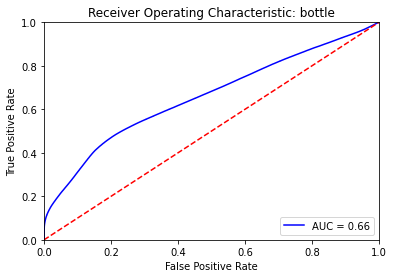

bottle	0.6581574308718442


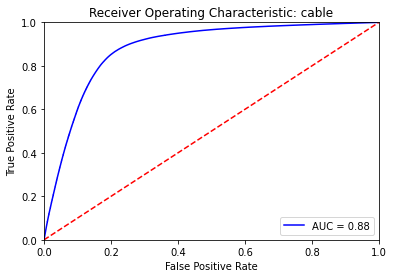

cable	0.8803764481837543


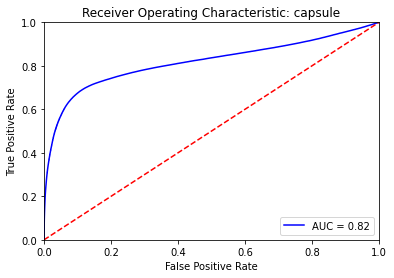

capsule	0.8165903650941473


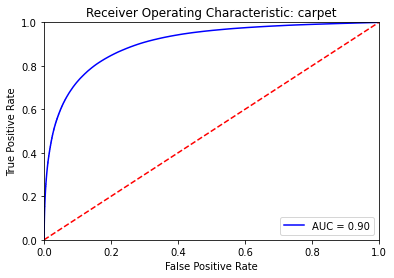

carpet	0.904437017689806


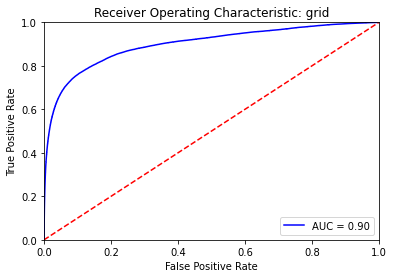

grid	0.8982124165033849


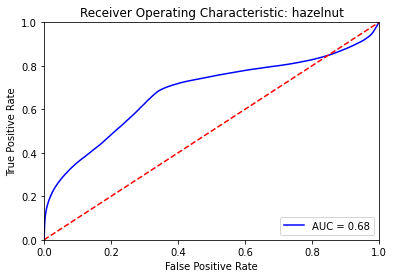

hazelnut	0.679420284666923


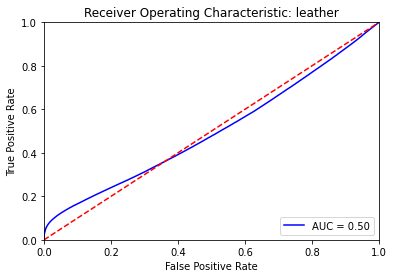

leather	0.49987836488417553


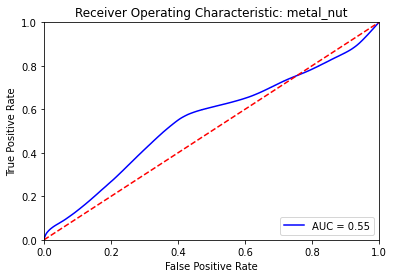

metal_nut	0.5499028898483694


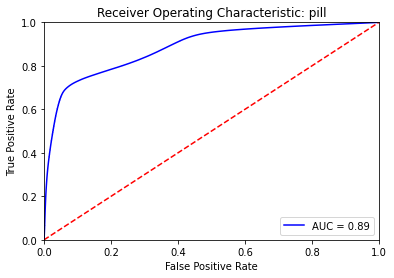

pill	0.8859619194961722


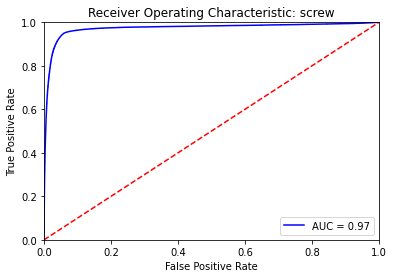

screw	0.9730625225333505


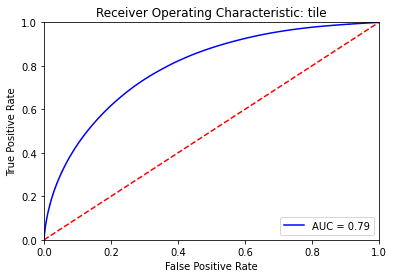

tile	0.7930620325942807


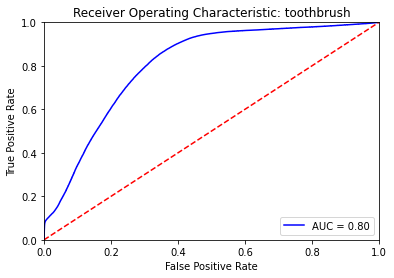

toothbrush	0.8042369480067783


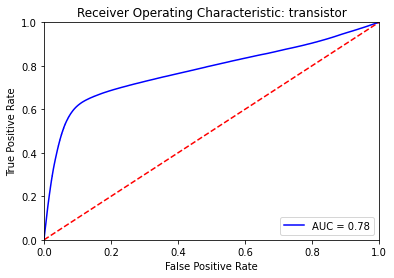

transistor	0.7772129076557421


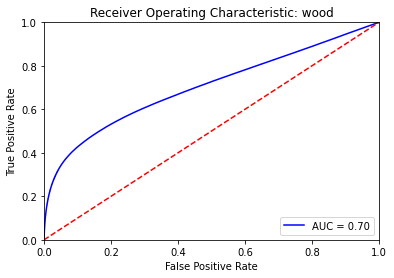

wood	0.7021757886675741


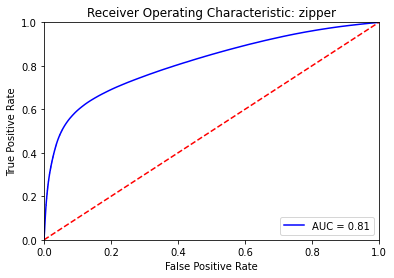

zipper	0.8121743512956574


In [265]:
create_graphs(seg_full_data)

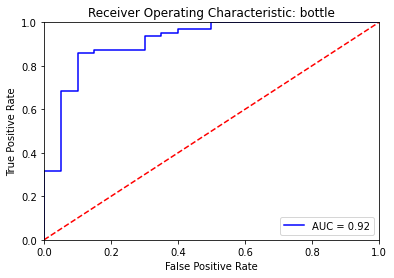

bottle	0.915079365079365


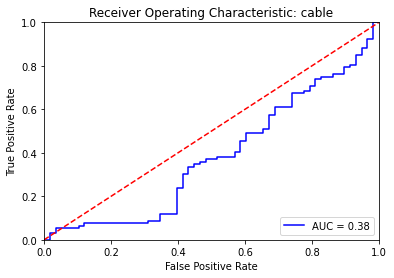

cable	0.3817466266866566


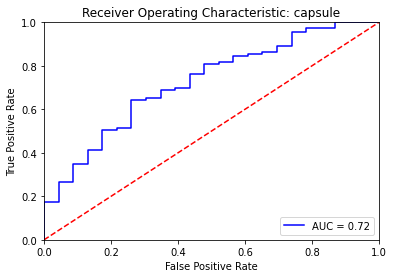

capsule	0.72317510969286


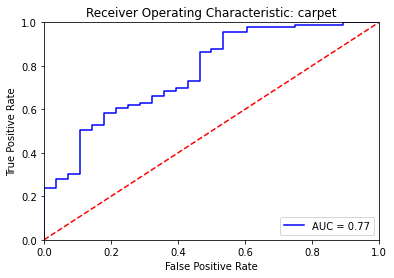

carpet	0.7708667736757625


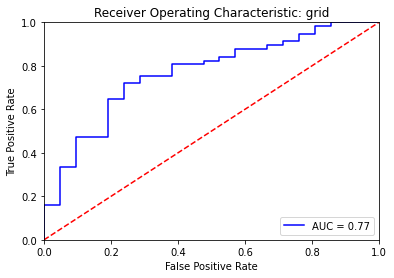

grid	0.7660818713450291


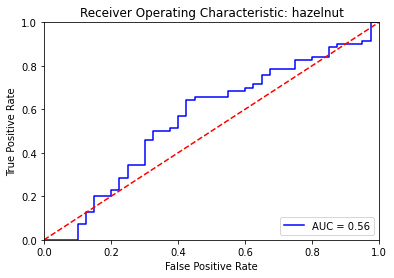

hazelnut	0.5589285714285714


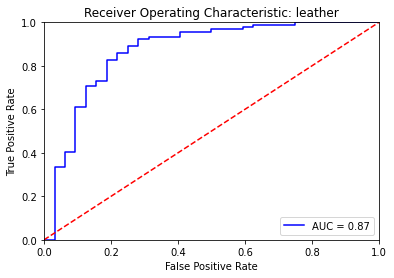

leather	0.868546195652174


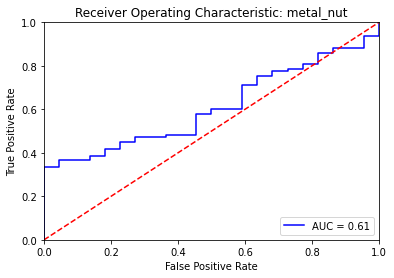

metal_nut	0.6094819159335289


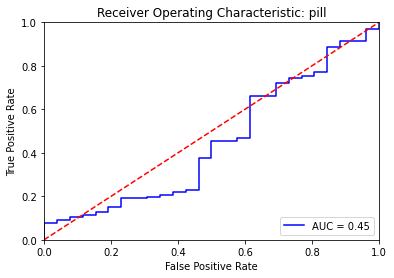

pill	0.4481723949809056


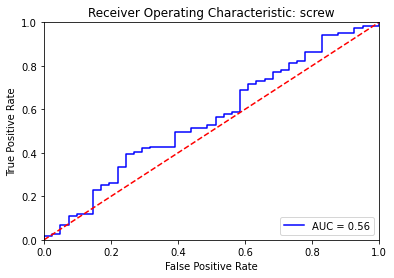

screw	0.5568764091002254


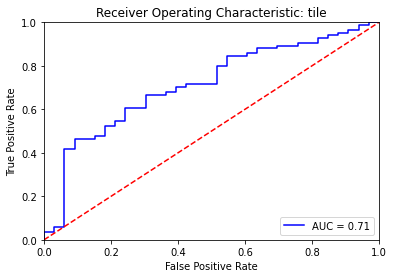

tile	0.7132034632034632


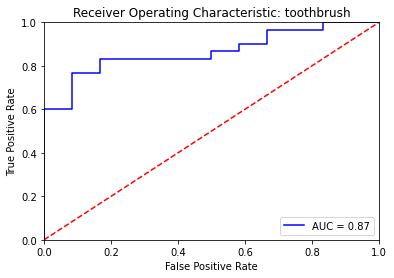

toothbrush	0.8666666666666667


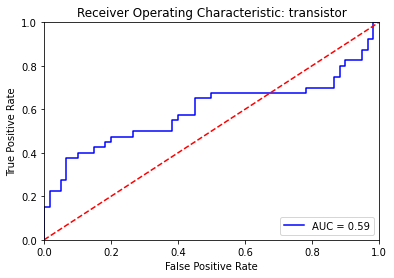

transistor	0.5925


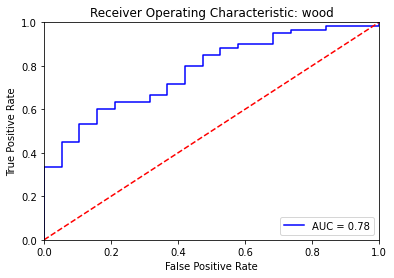

wood	0.775438596491228


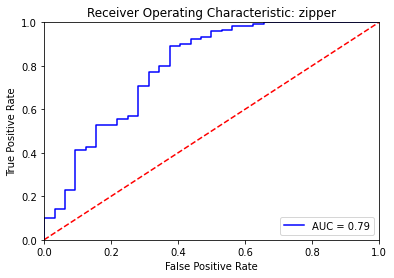

zipper	0.790703781512605


In [266]:
create_graphs(det_full_data)

{'auroc': 0.7333288667204197, 'fpr': array([0.        , 0.        , 0.        , ..., 0.99999965, 0.99999993,
       1.        ]), 'tpr': array([0.00000000e+00, 4.63306367e-07, 9.26612735e-07, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00]), 'optimal_threshold': 0.04212476, 'optimal_fpr': 0.07378886296198918, 'optimal_fnr': 0.04496015238965678}


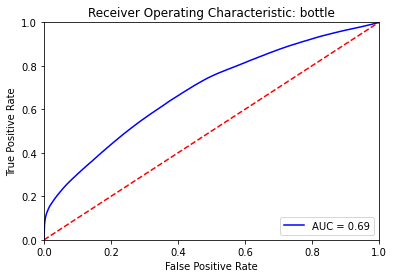

bottle	0.6864610444439155


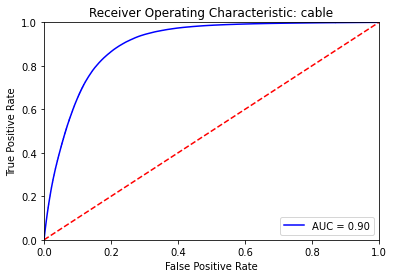

cable	0.9006777600124078


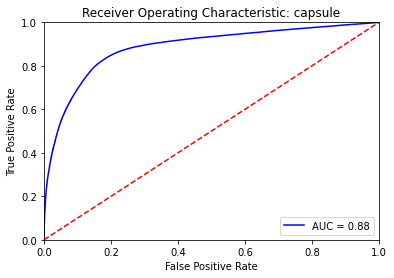

capsule	0.8842745396298195


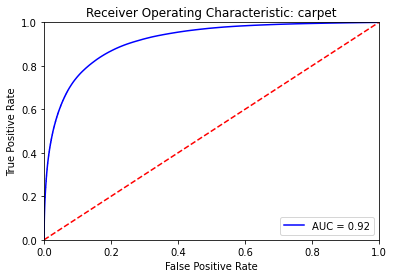

carpet	0.9151585550829391


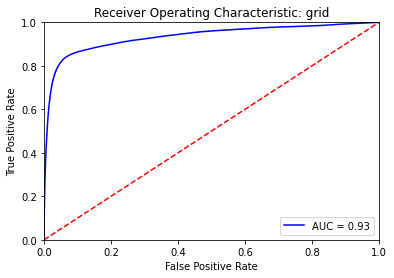

grid	0.9338834263160055


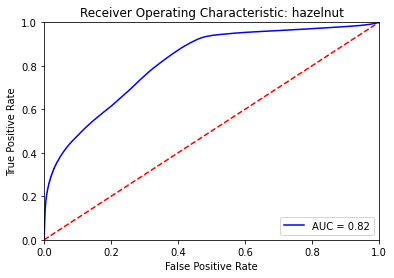

hazelnut	0.8159316713078474


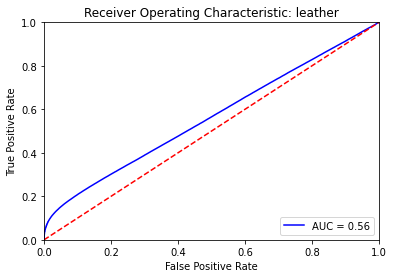

leather	0.5622559003475739


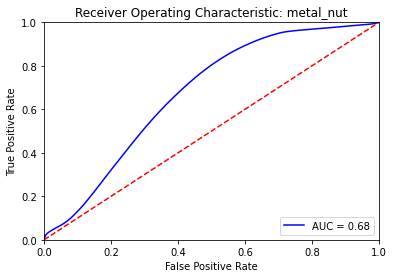

metal_nut	0.6750711979312719


In [ ]:
create_graphs(seg_linear_data)

In [ ]:
create_graphs(det_linear_data)